<div style="text-align:center"><span style="font-size:2em; font-weight: bold;">Lecture 3—Matrices</span></div>

# Data Science: Matrix calculus

## Matrix calculus
### Types
We only care about matrix differentiation. To understand matrix derivatives, you need to recognize that their are various possibilities. These cases can be defined by the intersection of two possible things: generalizing the derivative operator from being a scalar to being a vector or matrix and generalizing the quantity the operator is acting on from being a scalar to being a vector or matrix. We are not going to consider matrix operators or operands. These are just unnecessary for our purposes. We only care about vectors. The operator can be a vector and the operand can be a vector. This is enough generalization for us. If the operator is a vector and the operand is a vector, then the output will be a matrix.  
### Basic rules	
Doing calculus with matrices requires applying various known solutions. These can be verified and proven mathematically but that is not necessary for our purposes. We only need to know the rules. The first is that the derivative applies directly to sums just like a normal univariate derivative:
$$\frac{d}{dx}\left(f(x)+g(x)\right)=\frac{d}{dx}f(x)+\frac{d}{dx}g(x)$$
The second rule is that linear terms have simple constant derivatives:
$$\frac{d}{dx}A'x=\frac{d}{dx}x'A=A$$
Our third and final basic rule is that quadratic forms become linear terms like so:
$$\frac{d}{dx}x'Ax=2Ax$$
### Advanced rules
We don't need these rules for deriving OLS, but we might need these two rules in future. The first rule is the product rule for matrices. This is something like the univariate product rule, but it's somewhat different:
$$\frac{d}{dx}f(x)'g(x)=\left(\frac{d}{dx}g(x)'\right)f(x)+\left(\frac{d}{dx}f(x)'\right)g(x)$$
The second rule is the chain rule. It's basically the same as the chain rule you already know:
$$\frac{d}{dx}f(g(x))=\frac{dg}{dx}\text{diag}\left(\frac{df}{dg}\Big\vert_{g(x)}\right)$$
### Application: Derivation of OLS
Consider the usual linear equation for OLS: $y=\mathbf X\beta +e$. Our goal is to find the $\beta$ value which solves the following problem: $\min_\beta e'e$. To do this, we need to revise the goal to be in terms of the $\beta$ values:
$$\begin{align}
e'e&=(y-\mathbf X\beta)'(y-\mathbf X\beta)\\
&=y'y-y'\mathbf X\beta-\beta'\mathbf X'y+
\beta'
\mathbf X'\mathbf X\beta
\end{align}$$
Now we are ready to take the first derivative applying our matrix calculus formulas:
$$\frac{d}{d\beta}e'e=\mathbf 0-\mathbf X'y-\mathbf X'y+2\mathbf X'\mathbf X\beta$$
From here, we can set this derivative equal to $0$
$$-\mathbf X'y+\mathbf X'\mathbf X\beta=0$$
Now we solve for $\beta$:
$$\beta=\left(\mathbf X'\mathbf X\right)^{-1}\mathbf X'y$$
So $\hat\beta=\left(\mathbf X'\mathbf X\right)^{-1}\mathbf X'y$
        

# Programming: Linear algebra packages

Numpy

* [Introduction to NumPy](lec3files/02.00-Introduction-to-NumPy.ipynb)
* [Understanding Data Types](lec3files/02.01-Understanding-Data-Types.ipynb)
* [The Basics Of NumPy Arrays](lec3files/02.02-The-Basics-Of-NumPy-Arrays.ipynb)
* [Computation on arrays aggregates](lec3files/02.04-Computation-on-arrays-aggregates.ipynb)
* [Computation on arrays broadcasting](lec3files/02.05-Computation-on-arrays-broadcasting.ipynb)
* [Boolean Arrays and Masks](lec3files/02.06-Boolean-Arrays-and-Masks.ipynb)
* [Fancy Indexing](lec3files/02.07-Fancy-Indexing.ipynb)
* [Sorting](lec3files/02.08-Sorting.ipynb)

Matplotlib

* [Introduction To Matplotlib](lec3files/04.00-Introduction-To-Matplotlib.ipynb)
* [Simple Line Plots](lec3files/04.01-Simple-Line-Plots.ipynb)
* [Simple Scatter Plots](lec3files/04.02-Simple-Scatter-Plots.ipynb)
* [Density and Contour Plots](lec3files/04.04-Density-and-Contour-Plots.ipynb)
* [Histograms and Binnings](lec3files/04.05-Histograms-and-Binnings.ipynb)
* [Three Dimensional Plotting](lec3files/04.12-Three-Dimensional-Plotting.ipynb)
* [Visualization With Seaborn](lec3files/04.14-Visualization-With-Seaborn.ipynb)
* [Further Resources](lec3files/04.15-Further-Resources.ipynb)

In [36]:
import numpy as np

x = np.random.poisson(lam=2,size=(10,5))
x.sum(1)

array([ 8,  5, 14, 10,  9, 18,  7,  9, 13,  8])

In [62]:
n = 1000
x = np.random.normal(size=(n,2)) # mu=0;sigma=1
e = np.random.normal(size=(n,1))
ones = np.ones((n,1))
x = np.hstack([ones,x])
b = np.array([1,2,0]).reshape(-1,1)
y = x@b + e
#y = 1+2x_1+0x_2+e

In [69]:
# b = (x'x)^{-1} x'y
xx = x.T@x
xy = x.T@y
#b = np.linalg.inv(xx)@xy
b = np.linalg.solve(xx,xy)
# Solve: Ax=y  x=A^{-1}y
b

array([[ 1.03756356],
       [ 2.04162229],
       [-0.0046202 ]])

In [73]:
np.linalg.solve(x.T@x,x.T@y)

array([[ 1.03756356],
       [ 2.04162229],
       [-0.0046202 ]])

In [74]:
res= y-x@b
res.var()

0.9867699449253381

In [75]:
res = y-x@b
rsq = 1-res.var()/y.var()
rsq

0.8060285573961082

# Programming challenges	
## Pairwise combination matrix

I call the following matrix the pairwise combination matrix of order $4$:

$$
\begin{bmatrix}
1 & 1 & 0 & 0 \\
1 & 0 & 1 & 0 \\
1 & 0 & 0 & 1 \\
0 & 1 & 1 & 0 \\
0 & 1 & 0 & 1 \\
0 & 0 & 1 & 1 \\
\end{bmatrix}
$$

Notice that each line contains exactly two ones. This should be true of any pairwise combination matrix. Write a function which creates the pairwise combination matrix of order $n$.


$$
\begin{bmatrix}
1 & 1 & 0 & 0 & 0 \\
1 & 0 & 1 & 0 & 0 \\
1 & 0 & 0 & 1 & 0 \\
1 & 0 & 0 & 0 & 1 \\
0 & 1 & 1 & 0 & 0 \\
0 & 1 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 & 1 \\
0 & 0 & 1 & 1 & 0 \\
0 & 0 & 1 & 0 & 1 \\
0 & 0 & 0 & 1 & 1 \\
\end{bmatrix}
$$

$$
\begin{bmatrix}
1 & 1 & 0 \\
1 & 0 & 1 \\
0 & 1 & 1 \\
\end{bmatrix}
$$

$$
\begin{bmatrix}
1 & 1 \\
\end{bmatrix}
$$

In [5]:
import numpy as np

def pairwise(r):
    P = np.array([[1,1]])
    for i in range(2,r):
        lower = np.hstack([np.zeros([P.shape[0],1]),P])
        upper = np.hstack([np.ones([i,1]),np.eye(i)])
        P = np.vstack([upper,lower])
    return P
pairwise(6)

array([[1., 1., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 1., 1.]])

In [8]:
np.diagflat(np.random.uniform(size=(P.shape[0])))@P

array([[0.37562223, 0.37562223, 0.        , 0.        , 0.        ],
       [0.76113259, 0.        , 0.76113259, 0.        , 0.        ],
       [0.42349429, 0.        , 0.        , 0.42349429, 0.        ],
       [0.28911865, 0.        , 0.        , 0.        , 0.28911865],
       [0.        , 0.90778715, 0.90778715, 0.        , 0.        ],
       [0.        , 0.74835544, 0.        , 0.74835544, 0.        ],
       [0.        , 0.09840537, 0.        , 0.        , 0.09840537],
       [0.        , 0.        , 0.70741227, 0.70741227, 0.        ],
       [0.        , 0.        , 0.75670046, 0.        , 0.75670046],
       [0.        , 0.        , 0.        , 0.12585642, 0.12585642]])

In [10]:
def generate_mvt_normal(n,r):
    P = pairwise(r)
    individual = np.random.normal(size=(n,r))
    common = np.random.normal(size=(n,P.shape[0]))
    return common@np.diagflat(np.random.uniform(size=(P.shape[0])))@P+individual
np.corrcoef(generate_mvt_normal(1000,5).T)

array([[ 1.        ,  0.19081092,  0.08687246,  0.12681418,  0.20002474],
       [ 0.19081092,  1.        ,  0.18244426, -0.04876696,  0.03820795],
       [ 0.08687246,  0.18244426,  1.        ,  0.06072716,  0.09292239],
       [ 0.12681418, -0.04876696,  0.06072716,  1.        ,  0.00793825],
       [ 0.20002474,  0.03820795,  0.09292239,  0.00793825,  1.        ]])

## Cantor-Lebesgue CDF

Write a program that shows the Cantor-Lebesgue CDF.

In [13]:
1/2**50

8.881784197001252e-16

In [14]:
def cantor(x,lower=0,upper=1,level=1,voffset=0):
    third = (upper-lower)/3
    midpoint = voffset+1/2**level
    if level>50: return midpoint
    elif x<lower: return 0
    elif x<lower+third: return cantor(x,lower,lower+third,level+1,voffset)
    elif x<lower+2*third: return midpoint
    elif x<upper: return cantor(x,lower+2*third,upper,level+1,midpoint)
    else: return 1

In [28]:
cantor(0.75)

0.6666666666569654

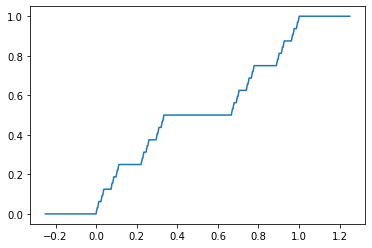

In [29]:
import matplotlib.pyplot as plt

x = np.linspace(-0.25,1.25,1000)
y = x.copy()
for i in range(len(x)):
    y[i] = cantor(x[i])
plt.plot(x,y);

## Beta GMM

Write an estimator for the beta distribution parameters using the generalized method of moments. That is, suppose that you estimate the mean and variance of the data. Then equate the mean and variance to $\alpha$ and $\beta$ using the beta distribution formulas from wikipedia:

$$\bar x = \frac{\alpha}{\alpha+\beta}$$
$$s_x^2= \frac{\alpha\beta}{(\alpha+\beta)^2 (\alpha+\beta+1)}$$

then solve for $\alpha$ and $\beta$.

$$ \alpha = \bar x \left( \frac{\bar x(1-\bar x)-s_x^2}{s_x^2} \right) $$
$$ \beta = (1-\bar x) \left( \frac{\bar x(1-\bar x)-s_x^2}{s_x^2} \right) $$

In [30]:
n = 1000
x = np.random.beta(a=3,b=1,size=(n,))

In [31]:
(mx,vx) = (x.mean(),x.var())
(mx,vx)

(0.7528943014592478, 0.037026459629172746)

In [32]:
Q = mx*(1-mx)-vx
Q /= vx
a = mx*Q
b = (1-mx)*Q
(a,b)

(3.030125312286122, 0.9945104253110161)